                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     246.3
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.91e-18
Time:                        11:46:36   Log-Likelihood:                -183.64
No. Observations:                  41   AIC:                             371.3
Df Residuals:                      39   BIC:                             374.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.2242     11.983     -2.355      0.0

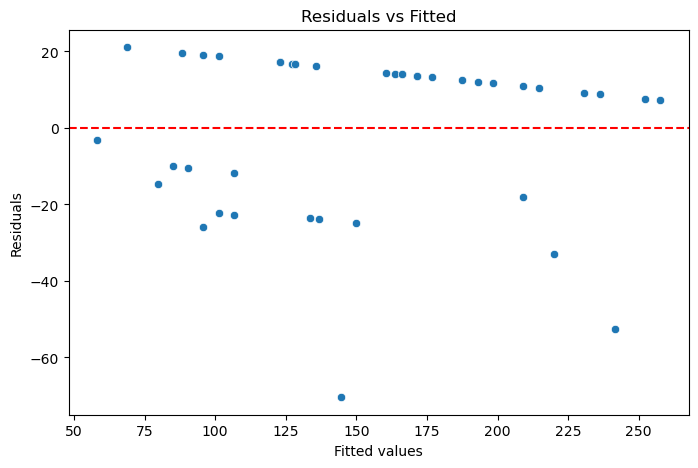


Breusch-Pagan Test Results:
LM stat: 0.1080
LM p-value: 0.7424
F-stat: 0.1030
F p-value: 0.7500


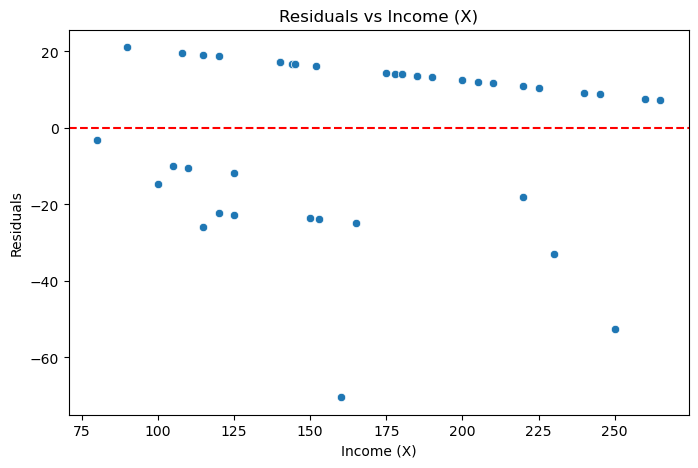

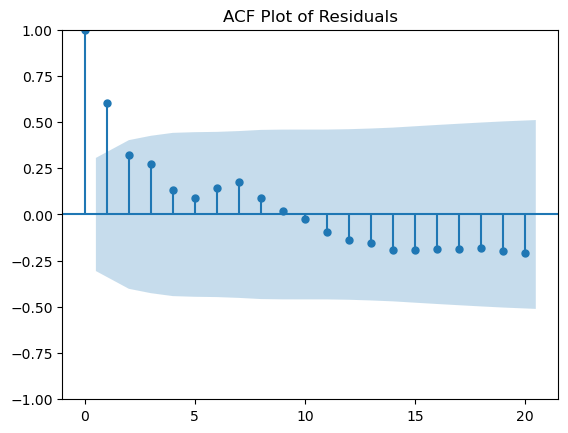


Durbin-Watson Statistic: 0.6457


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# Step 1: Load Data
Y = [55, 65, 70, 80, 79, 84, 95, 90, 75, 74, 110, 113, 125, 108, 115, 140, 120, 145, 180, 152,
     144, 175, 185, 140, 178, 145, 180, 225, 200, 240, 185, 220, 210, 245, 260, 190, 205, 265,
     191, 187, 189]
X = [80, 100, 115, 110, 120, 125, 125, 90, 105, 160, 150, 153, 165, 108, 115, 140, 120, 145, 180, 152,
     144, 175, 185, 140, 178, 145, 180, 225, 200, 240, 185, 220, 210, 245, 260, 190, 205, 265,
     220, 230, 250]

# Convert to DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})

# Step 2: Fit Linear Regression Model
X_with_const = sm.add_constant(df['X'])  # Add intercept
model = sm.OLS(df['Y'], X_with_const).fit()
print(model.summary())

# Step 3: Residual Analysis
df['fitted'] = model.fittedvalues
df['residuals'] = model.resid

# Plot Residuals vs Fitted
plt.figure(figsize=(8,5))
sns.scatterplot(x='fitted', y='residuals', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Step 4: Breusch-Pagan Test
bp_test = het_breuschpagan(model.resid, X_with_const)
bp_labels = ['LM stat', 'LM p-value', 'F-stat', 'F p-value']
bp_results = dict(zip(bp_labels, bp_test))
print("\nBreusch-Pagan Test Results:")
for k, v in bp_results.items():
    print(f"{k}: {v:.4f}")

# Step 5: Residuals vs X (for cross-sectional data)
plt.figure(figsize=(8,5))
sns.scatterplot(x='X', y='residuals', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Income (X)')
plt.xlabel('Income (X)')
plt.ylabel('Residuals')
plt.show()

# Step 6: ACF plot
plot_acf(df['residuals'], lags=20)
plt.title('ACF Plot of Residuals')
plt.show()

# Step 7: Durbin-Watson Test
dw_stat = durbin_watson(model.resid)
print(f"\nDurbin-Watson Statistic: {dw_stat:.4f}")
